In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha","fDist","class"]
df = pd.read_csv('magic_gamma_telescope\\magic04.data',names=cols)

In [3]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [5]:
df["class"] = (df["class"] == "g").astype(int)
# df["class"] = df["class"].map({"g":0,"h":1})
df["class"].unique()

array([1, 0])

In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


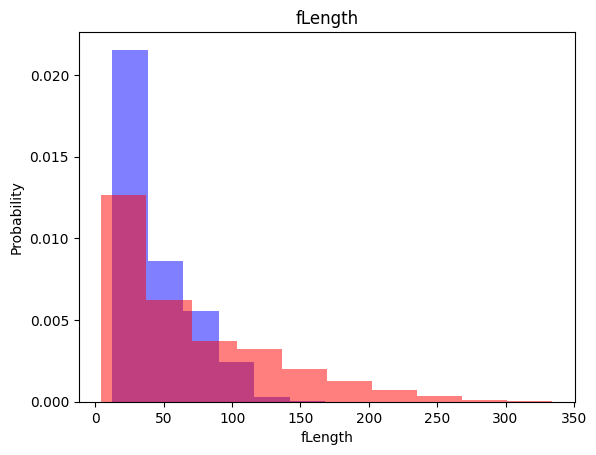

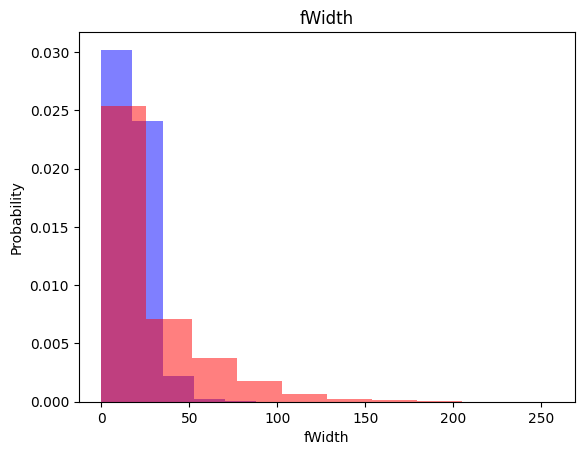

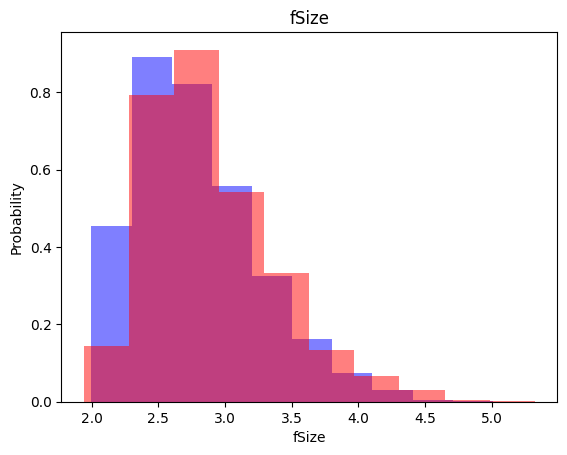

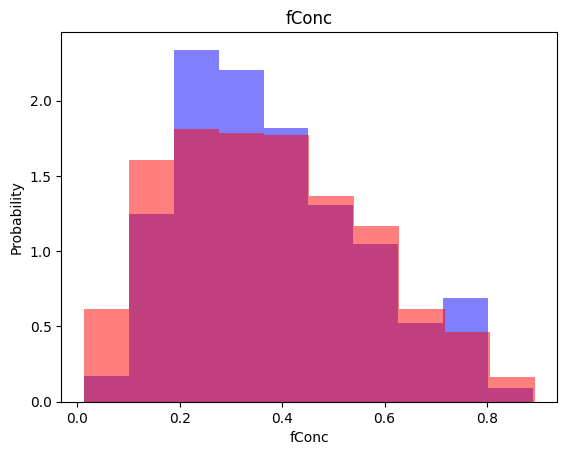

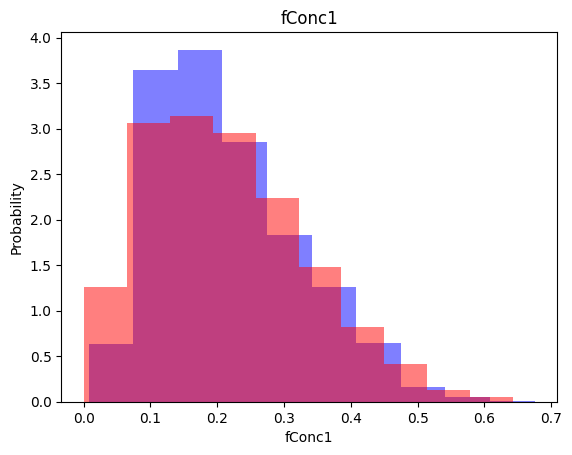

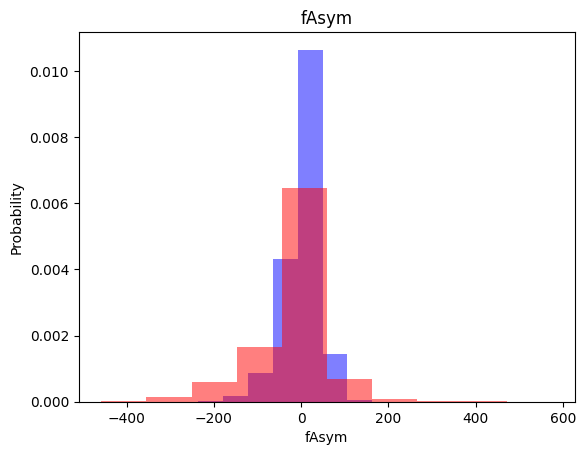

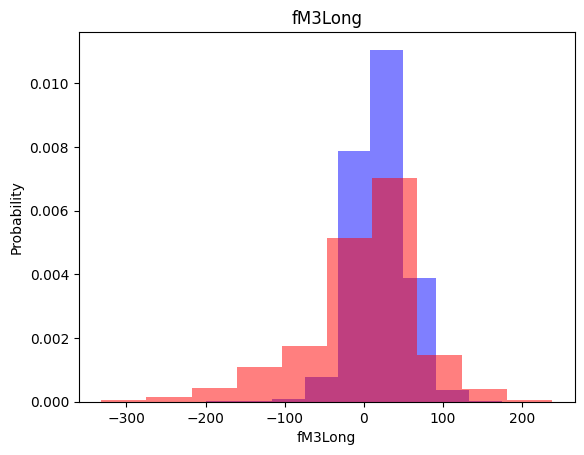

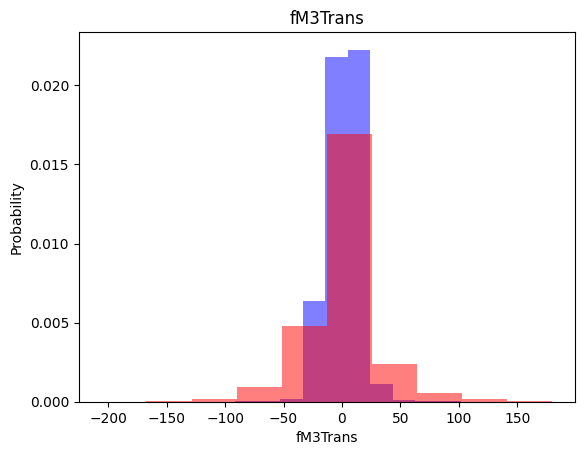

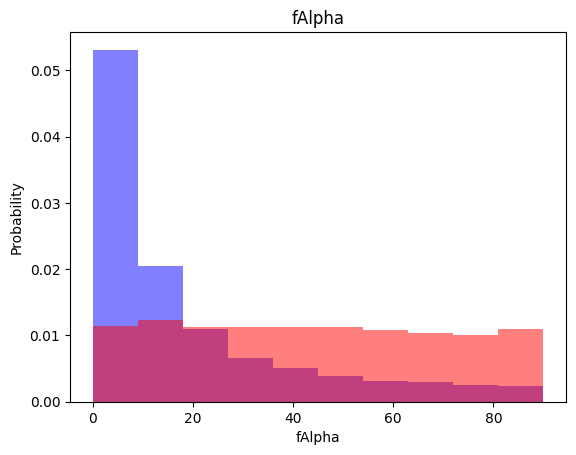

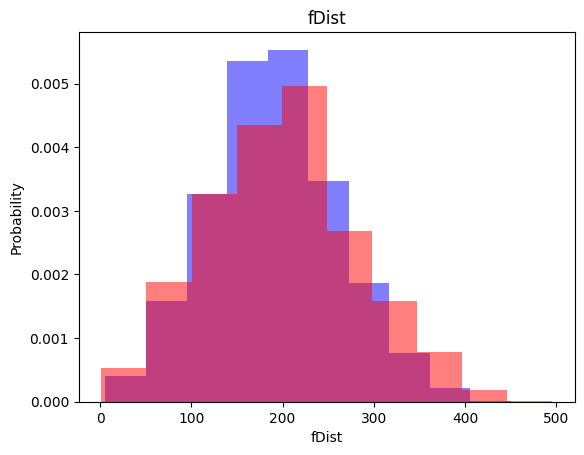

In [7]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label],color='blue',alpha=0.5,label='gemma',density=True)
    plt.hist(df[df["class"]==0][label],color='red',alpha=0.5,label='hadron',density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.show()

In [8]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

s:\workspace\Youtube\freecodecamp\ML4E\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
def scale_datatset(dataframe, oversample):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    scaler = StandardScaler()
    X = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler(random_state=0)
        X, y = ros.fit_resample(X, y)
    data = np.hstack((X,y.reshape(-1,1)))
    return data, X, y

In [10]:
train["class"].value_counts()

class
1    7352
0    4060
Name: count, dtype: int64

In [11]:
train,x_train,y_train =  scale_datatset(train, True)

In [12]:
sum(y_train==1)

np.int64(7352)

In [13]:
sum(y_train==0)

np.int64(7352)

In [14]:
valid,x_valid,y_valid =  scale_datatset(valid, False)
test,x_test,y_test =  scale_datatset(test, False)

kNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = knn_model.predict(x_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1283
           1       0.87      0.85      0.86      2521

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [21]:
y_pred = nb_model.predict(x_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.51      1283
           1       0.75      0.90      0.82      2521

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



Logistic Regression

In [23]:
from sklearn .linear_model import LogisticRegression

In [24]:
lg_model = LogisticRegression()

In [25]:
lg_model = lg_model.fit(x_train,y_train)

In [26]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69      1283
           1       0.85      0.81      0.83      2521

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.79      3804



SVM

In [27]:
from sklearn.svm import SVC

In [28]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [29]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1283
           1       0.90      0.89      0.89      2521

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



In [30]:
import tensorflow as tf

In [31]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [32]:
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(10,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

s:\workspace\Youtube\freecodecamp\ML4E\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = nn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid))

Epoch 1/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7125 - loss: 0.5558 - val_accuracy: 0.8207 - val_loss: 0.4013
Epoch 2/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8226 - loss: 0.3886 - val_accuracy: 0.8428 - val_loss: 0.3653
Epoch 3/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8332 - loss: 0.3689 - val_accuracy: 0.8404 - val_loss: 0.3642
Epoch 4/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8360 - loss: 0.3642 - val_accuracy: 0.8478 - val_loss: 0.3555
Epoch 5/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8431 - loss: 0.3484 - val_accuracy: 0.8583 - val_loss: 0.3331
Epoch 6/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8518 - loss: 0.3405 - val_accuracy: 0.8570 - val_loss: 0.3515
Epoch 7/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8468 - loss: 0.3439 - val_accuracy: 0.8549 - val_loss: 0.3448
Epoch 8/100
460/460 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8548 - loss: 0.3300 - val_accu

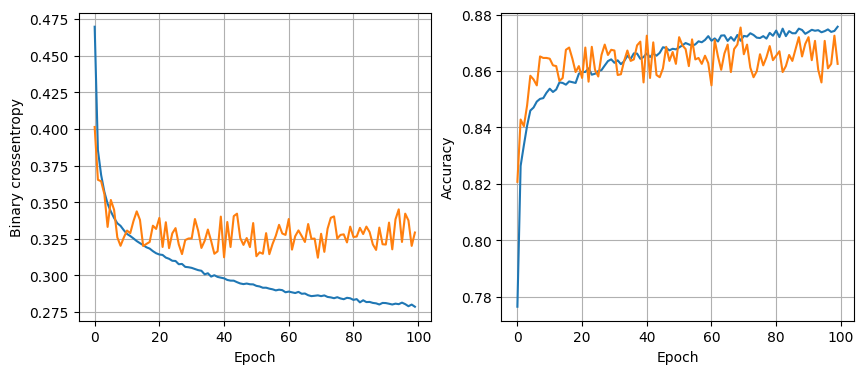

In [35]:
plot_history(history)

In [39]:

def train_model(x_train, y_train, num_nodes, dropout_prob,lr,batch_size,epochs):
    
    nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(num_nodes, input_shape=(10,), activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_valid, y_valid),verbose=0)
    return nn_model, history

    

Training model with num_nodes=16, dropout_prob=0.1, lr=0.001, batch_size=32


s:\workspace\Youtube\freecodecamp\ML4E\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


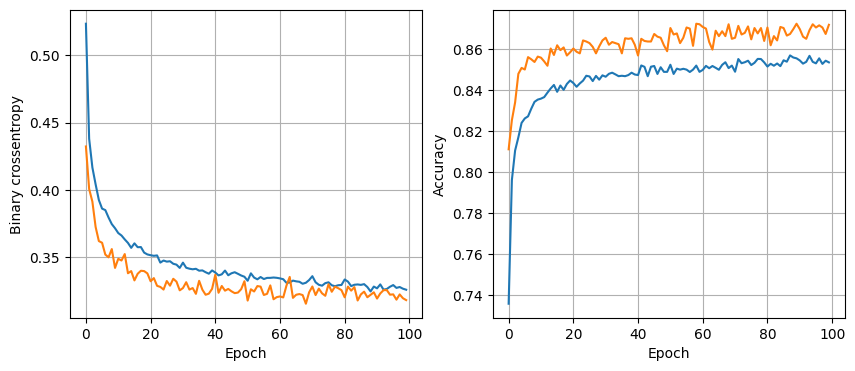

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8691 - loss: 0.3256
Training model with num_nodes=16, dropout_prob=0.1, lr=0.001, batch_size=64


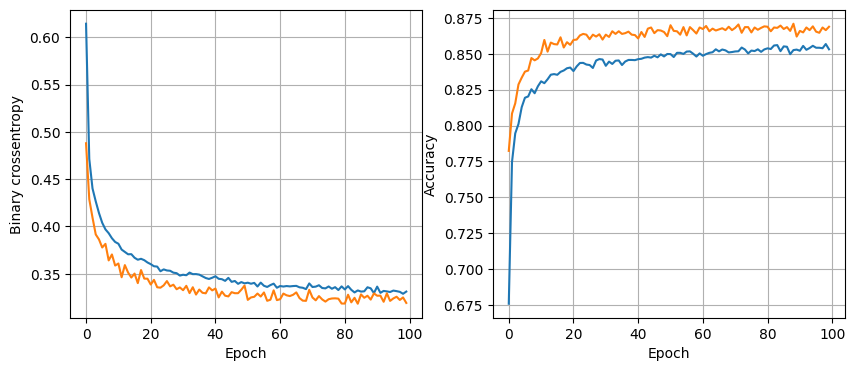

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8667 - loss: 0.3258
Training model with num_nodes=16, dropout_prob=0.1, lr=0.001, batch_size=128


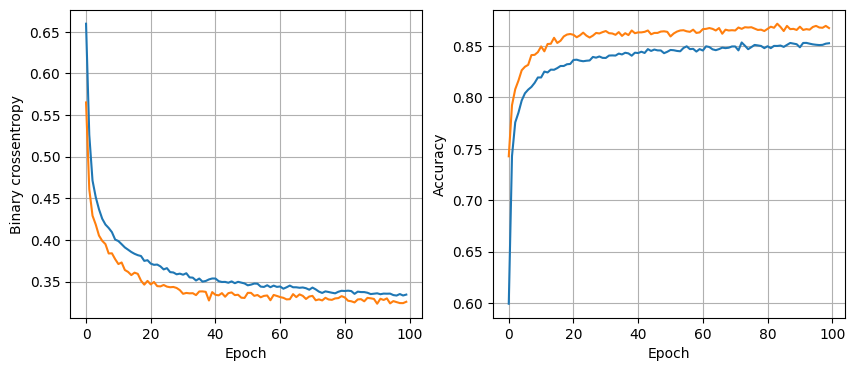

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8612 - loss: 0.3340
Training model with num_nodes=16, dropout_prob=0.1, lr=0.01, batch_size=32


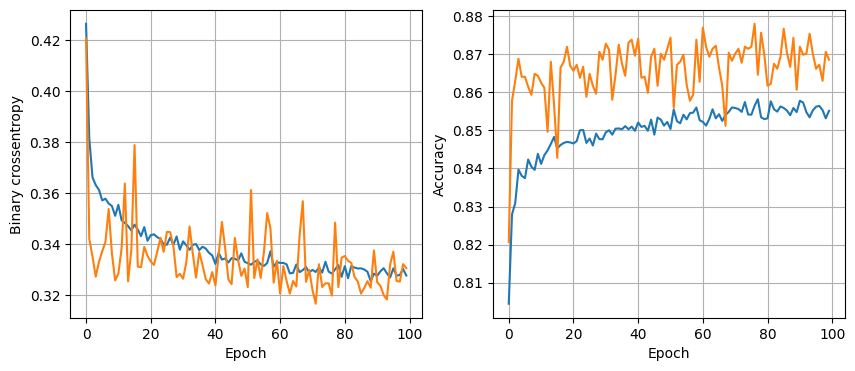

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8615 - loss: 0.3437
Training model with num_nodes=16, dropout_prob=0.1, lr=0.01, batch_size=64


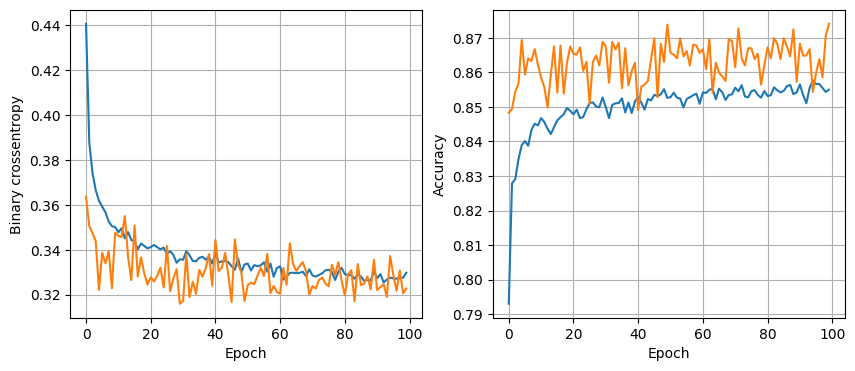

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8703 - loss: 0.3308
Training model with num_nodes=16, dropout_prob=0.1, lr=0.01, batch_size=128


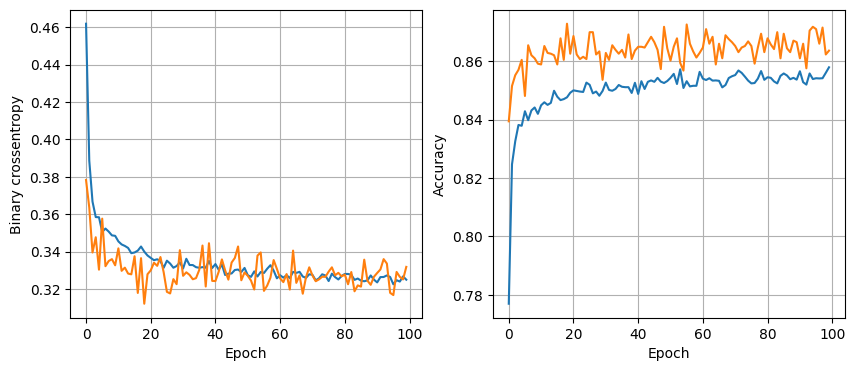

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3351
Training model with num_nodes=16, dropout_prob=0.1, lr=0.005, batch_size=32


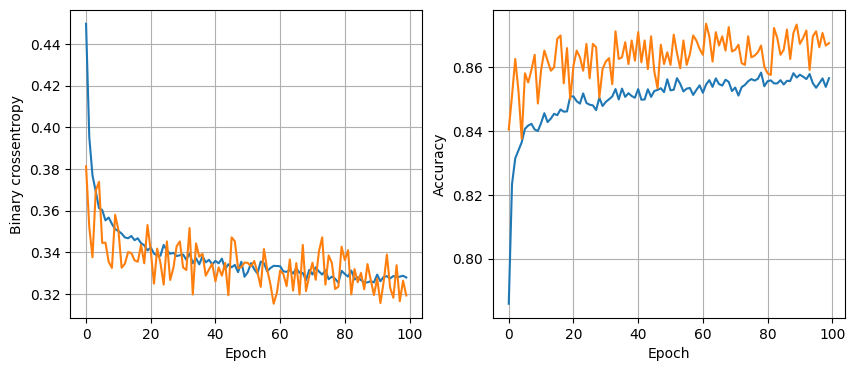

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3263
Training model with num_nodes=16, dropout_prob=0.1, lr=0.005, batch_size=64


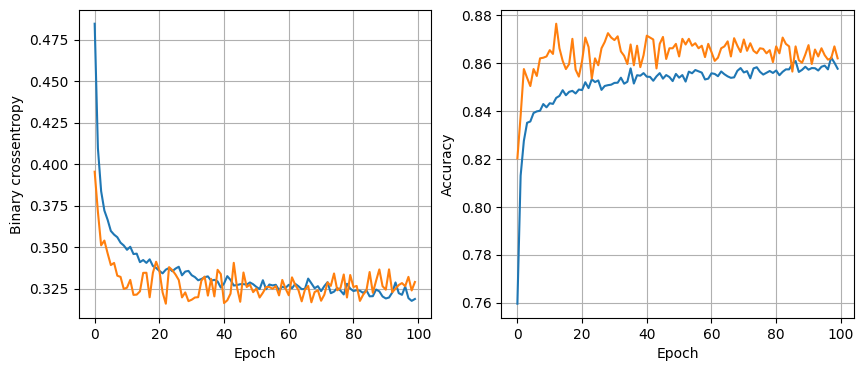

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.3325
Training model with num_nodes=16, dropout_prob=0.1, lr=0.005, batch_size=128


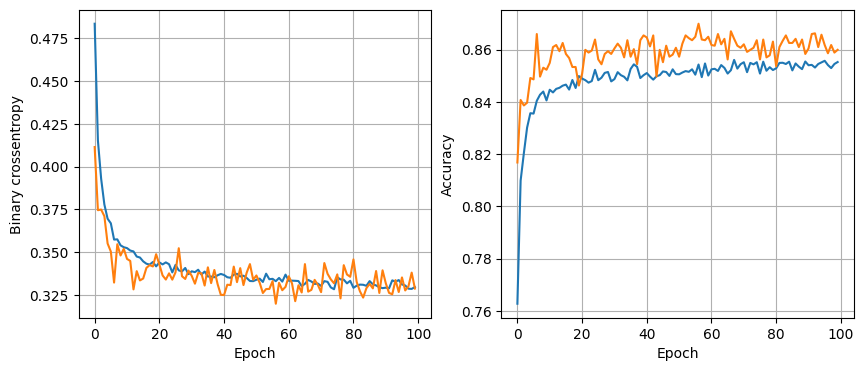

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8554 - loss: 0.3378
Training model with num_nodes=16, dropout_prob=0.2, lr=0.001, batch_size=32


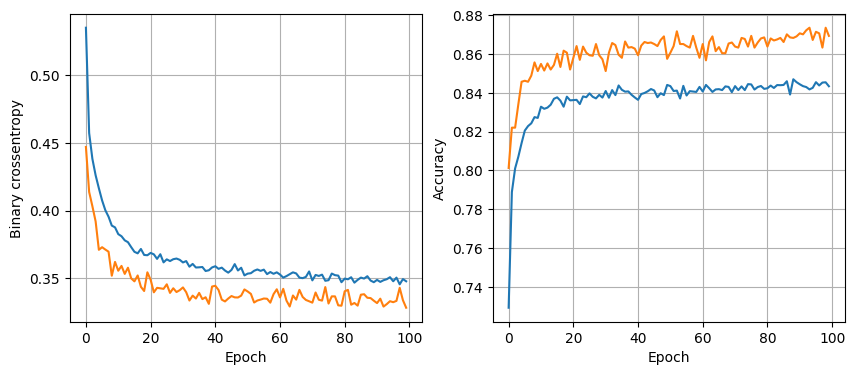

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.3373
Training model with num_nodes=16, dropout_prob=0.2, lr=0.001, batch_size=64


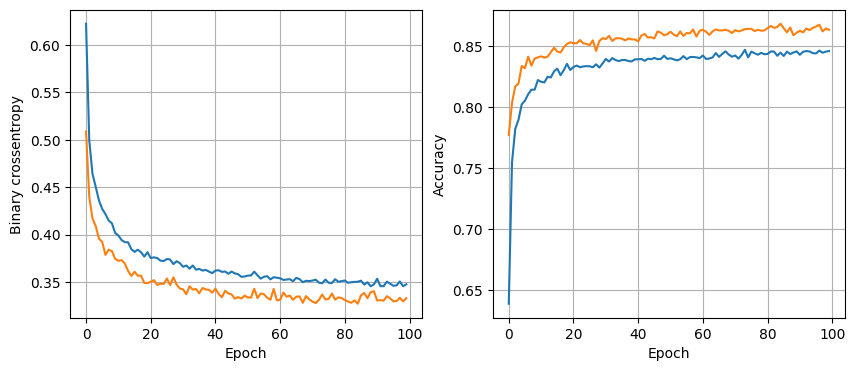

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.3387
Training model with num_nodes=16, dropout_prob=0.2, lr=0.001, batch_size=128


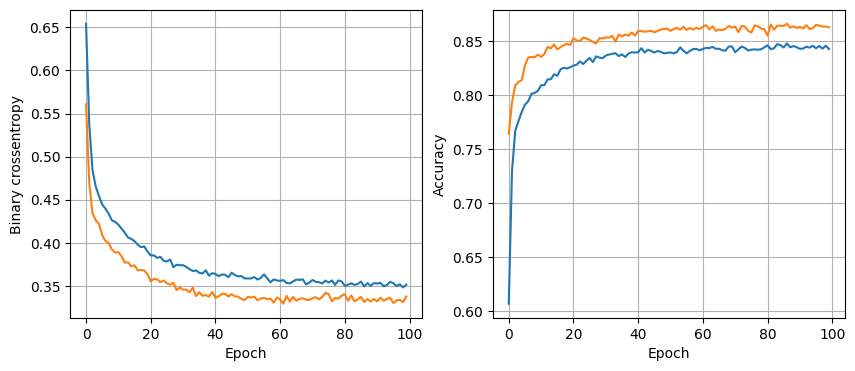

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3480
Training model with num_nodes=16, dropout_prob=0.2, lr=0.01, batch_size=32


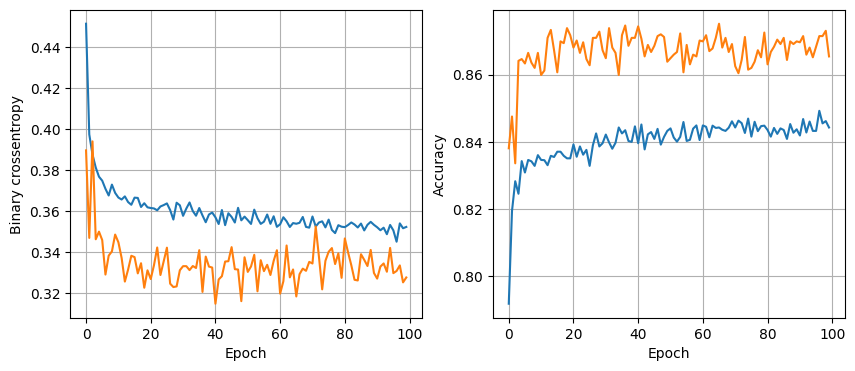

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3387
Training model with num_nodes=16, dropout_prob=0.2, lr=0.01, batch_size=64


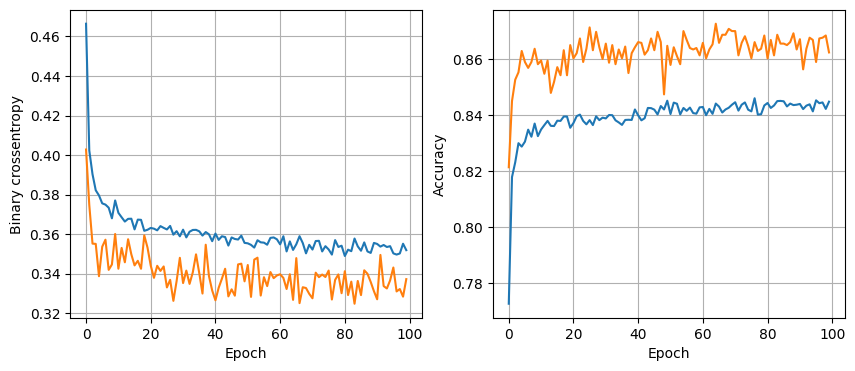

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8595 - loss: 0.3447
Training model with num_nodes=16, dropout_prob=0.2, lr=0.01, batch_size=128


KeyboardInterrupt: 

In [40]:
least_val_loss = float('inf')
least_val_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0.1,0.2,0.3]:
        for lr in [0.001,0.01,0.005]:
            for batch_size in [32,64,128]:
                print(f"Training model with num_nodes={num_nodes}, dropout_prob={dropout_prob}, lr={lr}, batch_size={batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss, val_acc = model.evaluate(x_valid, y_valid)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_val_model = model